In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parte 1

## Geração de dados artificiais com as características estatísticas desejadas de covariância.

In [2]:
# Gera dados gaussianos com atributos não-correlacionados
# Média teórica do atributo 1
m1 = 5  
# Desvio-padrao teorico do atributo 1
sig1 = 1  

# Média teórica do atributo 2
m2 = -5  
# Desvio-padrao teorico do atributo 2
sig2 = sig1

# Média teórica do atributo 3
m3 = 0
# Desvio-padrao teorico do atributo 3
sig3 = sig1  

# Quantidade de observacoes geradas de cada atributo
N = 5000 
X1 = np.random.normal(m1, sig1, N)
X2 = np.random.normal(m2, sig2, N)
X3 = np.random.normal(m3, sig3, N)

# Agrupa dados dos atributos em uma unica matriz
Xu = np.vstack((X1, X2, X3))

# Matriz desejada para os dados
Cd = np.array([[1, 1.8, -0.9], [1.8, 4, 0.6], [-0.9, 0.6, 9]])

print(Xu.shape)
print(Cd.shape)
Cd

(3, 5000)
(3, 3)


array([[ 1. ,  1.8, -0.9],
       [ 1.8,  4. ,  0.6],
       [-0.9,  0.6,  9. ]])

## Método de Choleski para decompor a matriz de covariância desejada e correlacionar os 3 atributos gaussianos inicialmente não correlacionados

In [3]:
# Decomposicao de Cholesky da matriz Cd
R = np.linalg.cholesky(Cd)

# Gera dados com atributos correlacionados com a matriz COV desejada
Xc = np.dot(R.T, Xu)  
print(Xc.shape)

(3, 5000)


# Parte 2

## (i) Estimar a matriz de covariância Cx associada aos dados sintéticos originais na matrix Xc

In [4]:
# Aplicacao de PCA aos dados correlacionados gerados no procedimento anterior.
# Estimar a matriz de covariância Cx associada aos dados sintéticos originais na matrix Xc
Cx = np.cov(Xc)  
Cx

array([[ 5.15318793, -0.80358358, -1.22901818],
       [-0.80358358,  7.14528013,  3.28759485],
       [-1.22901818,  3.28759485,  1.69327145]])

## (ii) Calcular os autovalores e a matriz de autovetores V

In [5]:
# Calcular os autovalores e a matriz de autovetores V
# L - vetor com os autovalores 
# V - matriz onde cada coluna é um autovetor
L, V = np.linalg.eig(Cx)
print('Autovalores: ', L)
print('Matriz autovetor: ', V)

Autovalores:  [9.0933604  4.86996465 0.02841445]
Matriz autovetor:  [[ 0.30697355 -0.93918279  0.15395758]
 [-0.84979    -0.34332336 -0.39998253]
 [-0.42851394  0.00804755  0.90349933]]


## (iii) Comparar com os autovalores e autovetores calculados pelo código Matlab/Octave fornecido.

## (iv) Verificar se a matriz de autovetores é ortonormal de duas maneiras

### A primeira é multiplicando ela por sua transposta

In [6]:
result = np.dot(V, V.T)
print(result)

is_orthogonal_1 = np.allclose(result, np.identity(V.shape[0]))

print('\nVerificação 1 - A matriz de autovetores é ortogonal:', is_orthogonal_1)

[[ 1.00000000e+00  5.15889961e-17 -7.16199093e-17]
 [ 5.15889961e-17  1.00000000e+00  1.87242730e-16]
 [-7.16199093e-17  1.87242730e-16  1.00000000e+00]]

Verificação 1 - A matriz de autovetores é ortogonal: True


### A outra é invertendo-a usando uma função de cálculo de matriz inversa (no Python) e comparando com a transposta de V

In [7]:
V_inv = np.linalg.inv(V)

print('\nInversa de V:')
print(V_inv)
print('\nTransposta de V:')
print(V.T)

is_orthogonal_2 = np.allclose(V_inv, V.T)

print('\nVerificação 2 - A matriz de autovetores é ortogonal:', is_orthogonal_2)


Inversa de V:
[[ 0.30697355 -0.84979    -0.42851394]
 [-0.93918279 -0.34332336  0.00804755]
 [ 0.15395758 -0.39998253  0.90349933]]

Transposta de V:
[[ 0.30697355 -0.84979    -0.42851394]
 [-0.93918279 -0.34332336  0.00804755]
 [ 0.15395758 -0.39998253  0.90349933]]

Verificação 2 - A matriz de autovetores é ortogonal: True


## (v) Calcular a variância explicada por cada autovalor (VEi) e fazer o gráfico da variância explicada acumulativa (VEq)


Variancia explicada pelo i-esimo autovalor:
[64.99092125 34.80599855  0.2030802 ]

Variancia explicada pelos q primeiros autovalores:
[ 64.99092125  99.7969198  100.        ]


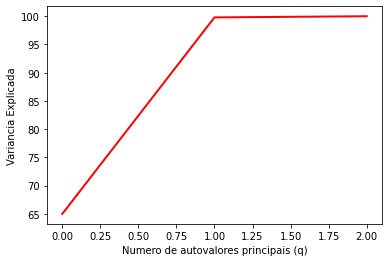

In [8]:
sorted_indices = np.argsort(L)[::-1]
L_sorted = L[sorted_indices]
V = V[:, sorted_indices]
VEi = 100 * L_sorted / np.sum(L_sorted)
VEq = 100 * np.cumsum(L_sorted) / np.sum(L_sorted)

print('\nVariancia explicada pelo i-esimo autovalor:')
print(VEi)
print('\nVariancia explicada pelos q primeiros autovalores:')
print(VEq)

plt.figure()
plt.plot(VEq, 'r-', linewidth=2)
plt.xlabel('Numero de autovalores principais (q)')
plt.ylabel('Variancia Explicada')
plt.show()

# Parte 3

## Comparar os resultados do PCA implementado passo-a-passo na Parte 2 com o método usando a decomposição em valores singulares (SVD, na sigla em Inglês)

In [9]:
# PCA a partir da SVD
U3, L3, V3 = np.linalg.svd(Cx)  
Q = V3

print('\nPCA tradicional:')
print(V)
print('\nPCA SVD:')
print(V3)

# Comparação dos autovetores
are_proportional = np.allclose(V, V3)
print("\nOs autovetores são proporcionais:", are_proportional)

sorted_indices_L3 = np.argsort(L3)[::-1]
L3_sorted = L3[sorted_indices_L3]

# Comparação dos autovalores
are_eigenvalues_close = np.allclose(L_sorted, L3_sorted)
print("Os autovalores são aproximadamente iguais:", are_eigenvalues_close)



PCA tradicional:
[[ 0.30697355 -0.93918279  0.15395758]
 [-0.84979    -0.34332336 -0.39998253]
 [-0.42851394  0.00804755  0.90349933]]

PCA SVD:
[[-0.30697355  0.84979     0.42851394]
 [-0.93918279 -0.34332336  0.00804755]
 [ 0.15395758 -0.39998253  0.90349933]]

Os autovetores são proporcionais: False
Os autovalores são aproximadamente iguais: True


# Parte 4

## Gerar os dados transformados; ou seja, gerar a matriz de dados Z.

In [10]:
# Gera dados via PCA (descorrelaciona matriz dos dados)
Z = np.dot(Q, Xc)  

## Verificar as propriedades esperadas para os dados transformados Z. Primeiro, numericamente, ao estimar a matriz de covariância Cz. Esta matriz é diagonal?

In [11]:
# Matriz de covariancia empirica dos dados transformados via PCA
Cz = np.cov(Z) 
print(Cz)

# Verificação se a matriz é diagonal
is_diagonal = np.allclose(Cz, np.diag(np.diagonal(Cz)))

print("A matriz é diagonal:", is_diagonal)

[[ 9.09336040e+00  4.44178045e-17 -1.58396112e-15]
 [ 4.44178045e-17  4.86996465e+00  3.47036307e-16]
 [-1.58396112e-15  3.47036307e-16  2.84144525e-02]]
A matriz é diagonal: True


O código acima mostra que a matriz é diagonal devido aos elementos fora da diagonal principal serem muito próximos de zero e os elementos da diagonal serem diferentes de zero.

## Que elementos estão na diagonal principal de Cz?

In [12]:
# Obter elementos da diagonal principal
diagonal_elements = np.diagonal(Cz)

print("Elementos da diagonal principal de Cz:", diagonal_elements)

Elementos da diagonal principal de Cz: [9.0933604  4.86996465 0.02841445]


## Em seguida, comparar o gráfico de dispersão (scatterplot) dos atributos X1 e X2 dos dados originais (correlacionados) e com o gráfico de Z1 e Z2 dos dados transformados (não correlacionados)

Text(0.5, 1.0, 'Dados Originais Nao-Correlacionados')

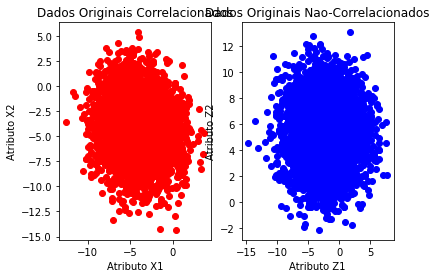

In [13]:
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(Xc[0, 0:5000], Xc[1, 0:5000], 'ro', linewidth=2)
plt.xlabel('Atributo X1')
plt.ylabel('Atributo X2')
plt.title('Dados Originais Correlacionados')

plt.subplot(1, 2, 2)
plt.plot(Z[0, 0:5000], Z[1, 0:5000], 'bo', linewidth=2)
plt.xlabel('Atributo Z1')
plt.ylabel('Atributo Z2')
plt.title('Dados Originais Nao-Correlacionados')

# Parte 5

## Projete os dados Xc em duas dimensões escolhendo apenas duas componentes (i.e.colunas da matriz de autovetores V).

In [14]:
print('Cx.shape', Cx.shape)
print('V.shape', V.shape)
V_2d = V[:, :2].T
print('V_2d.shape', V_2d.shape)
print('Xc.shape', Xc.shape)

# Dados em duas dimensões
DoisD = V_2d @ Xc

# Imprimir os dados projetados
print("\nDados Projetados em Duas Dimensões:")
print('DoisD.shape', DoisD.shape)

Cx.shape (3, 3)
V.shape (3, 3)
V_2d.shape (2, 3)
Xc.shape (3, 5000)

Dados Projetados em Duas Dimensões:
DoisD.shape (2, 5000)


## Em seguida, use a transposta da matriz Q para gerar a matriz de dados Xr, que é a matriz de reconstrução dos dados originais

In [15]:
Xr = np.dot(Q.T, Z)
print(Xr.shape)
Xr

(3, 5000)


array([[-2.69758955, -7.00278786, -5.5184589 , ..., -6.63574456,
        -4.42264796, -5.217896  ],
       [-4.46579167, -1.43670205,  1.87290387, ..., -2.6474745 ,
        -3.47901428, -2.53620977],
       [ 0.04488538,  2.07218147,  2.93011411, ...,  1.22493319,
         0.86102522,  0.97332183]])

## (i) Mostre as 4 primeiras colunas de Xr e compare com as 4 primeiras colunas de Xc. Os valores são próximos?

In [16]:
print(Xr[:, :4])
print('\n')
print(Xc[:, :4])

[[-2.69758955 -7.00278786 -5.5184589  -4.19800587]
 [-4.46579167 -1.43670205  1.87290387 -7.82940507]
 [ 0.04488538  2.07218147  2.93011411 -1.47290475]]


[[-2.69758955 -7.00278786 -5.5184589  -4.19800587]
 [-4.46579167 -1.43670205  1.87290387 -7.82940507]
 [ 0.04488538  2.07218147  2.93011411 -1.47290475]]


## (ii) Calcule a norma quadrática de Frobenius da matriz de erro E= Xc – Xr.

In [17]:
E = Xc - Xr  # Vetor erro de reconstrucao
NormaE2 = np.linalg.norm(E, 'fro')**2  # Norma de Frobenius para calcular o erro.
print(NormaE2)

3.4424205156205444e-26


## (iii) Vetorize a matriz E e calcule a soma dos erros quadráticos. Os valores de (i) e (ii) devem ser iguais.

In [18]:
E = E.flatten()  # Vetoriza matriz de erro
SSE = np.sum(E**2)  # Soma dos erros quadraticos de reconstrucao
SSE

3.4424205156205444e-26